# Islandwide School Revival Map

In [1]:
import pandas as pd
import numpy as np

In [2]:
df1 = pd.read_csv("general-information-of-schools.csv")
df2 = pd.read_csv("zip_to_lat_lon_Asia.csv")

/var/folders/rq/jvgm9dz559g9xyvpqqc2rlcm0000gn/T/ipykernel_28663/2142519282.py:2: DtypeWarning: Columns (1,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv("zip_to_lat_lon_Asia.csv")


In [3]:
print(df1.shape)
df1.head(3)

(346, 31)


school_name                            url_address  \
0      ADMIRALTY PRIMARY SCHOOL       https://admiraltypri.moe.edu.sg/   
1    ADMIRALTY SECONDARY SCHOOL     http://www.admiraltysec.moe.edu.sg   
2  AHMAD IBRAHIM PRIMARY SCHOOL  http://www.ahmadibrahimpri.moe.edu.sg   

                   address  postal_code telephone_no telephone_no_2    fax_no  \
0    11   WOODLANDS CIRCLE       738907     63620598             na  63627512   
1  31   WOODLANDS CRESCENT       737916     63651733       63654596  63652774   
2    10   YISHUN STREET 11       768643     67592906             na  67592927   

  fax_no_2            email_address           mrt_desc  ...   nature_code  \
0       na  ADMIRALTY_PS@MOE.EDU.SG  Admiralty Station  ...  CO-ED SCHOOL   
1       na  Admiralty_SS@moe.edu.sg      ADMIRALTY MRT  ...  CO-ED SCHOOL   
2       na          aips@moe.edu.sg             Yishun  ...  CO-ED SCHOOL   

     session_code mainlevel_code sap_ind autonomous_ind gifted_ind ip_ind  \
0        FULL DAY        PRIMARY      No             No         No     No   
1  SINGLE SESSION      SECONDARY      No             No         No     No   
2  SINGLE SESSION        PRIMARY      No             No         No     No   

  mothertongue1_code mothertongue2_code mothertongue3_code  
0            Chinese              Malay              Tamil  
1            Chinese              Malay              Tamil  
2            Chinese              Malay              Tamil  

[3 rows x 31 columns]

In [4]:
print(df2.shape)
df2.head(3)

(493652, 14)


country code postal code    place    state statecode province_or_county  \
0           AZ     AZ 0100  Abşeron  Abşeron         1                NaN   
1           AZ     AZ 0101  1 Sayli  Abşeron         1                NaN   
2           AZ     AZ 0102  2 Sayli  Abşeron         1                NaN   

  province_or_countycode community  communitycode  latitude  longitude  \
0                    NaN       NaN            NaN   40.4982    49.7582   
1                    NaN       NaN            NaN   40.4982    49.7582   
2                    NaN       NaN            NaN   40.4982    49.7582   

   accuracy     Country Continent  
0       1.0  Azerbaijan      Asia  
1       1.0  Azerbaijan      Asia  
2       1.0  Azerbaijan      Asia

In [5]:
df2 = df2[df2["Country"]=="Singapore"]

In [6]:
print(df2.shape)
df2.head(3)

(121154, 14)


country code postal code                 place state statecode  \
335288           SG       18906     Straits Boulevard   NaN       NaN   
335289           SG       18907     Straits Boulevard   NaN       NaN   
335290           SG       18910  Marina Gardens Drive   NaN       NaN   

       province_or_county province_or_countycode community  communitycode  \
335288                NaN                    NaN       NaN            NaN   
335289                NaN                    NaN       NaN            NaN   
335290                NaN                    NaN       NaN            NaN   

        latitude  longitude  accuracy    Country Continent  
335288    1.2758   103.8496       NaN  Singapore      Asia  
335289    1.2749   103.8517       NaN  Singapore      Asia  
335290    1.2796   103.8690       NaN  Singapore      Asia

In [7]:
df1.dtypes

school_name           object
url_address           object
address               object
postal_code            int64
telephone_no          object
telephone_no_2        object
fax_no                object
fax_no_2              object
email_address         object
mrt_desc              object
bus_desc              object
principal_name        object
first_vp_name         object
second_vp_name        object
third_vp_name         object
fourth_vp_name        object
fifth_vp_name         object
sixth_vp_name         object
dgp_code              object
zone_code             object
type_code             object
nature_code           object
session_code          object
mainlevel_code        object
sap_ind               object
autonomous_ind        object
gifted_ind            object
ip_ind                object
mothertongue1_code    object
mothertongue2_code    object
mothertongue3_code    object
dtype: object

In [8]:
df1 = df1[["school_name","address","postal_code","mrt_desc","dgp_code","zone_code","mainlevel_code"]]

In [9]:
df1

school_name                  address  postal_code  \
0          ADMIRALTY PRIMARY SCHOOL    11   WOODLANDS CIRCLE       738907   
1        ADMIRALTY SECONDARY SCHOOL  31   WOODLANDS CRESCENT       737916   
2      AHMAD IBRAHIM PRIMARY SCHOOL    10   YISHUN STREET 11       768643   
3    AHMAD IBRAHIM SECONDARY SCHOOL     751  YISHUN AVENUE 7       768928   
4                    AI TONG SCHOOL   100  Bright Hill Drive       579646   
..                              ...                      ...          ...   
341          ZHANGDE PRIMARY SCHOOL       51   Jalan Membina       169485   
342         ZHENGHUA PRIMARY SCHOOL          9    Fajar Road       679002   
343       ZHENGHUA SECONDARY SCHOOL          91   SENJA ROAD       677741   
344         ZHONGHUA PRIMARY SCHOOL  12   SERANGOON AVENUE 4       556095   
345       ZHONGHUA SECONDARY SCHOOL  13   SERANGOON AVENUE 3       556123   

                                      mrt_desc       dgp_code zone_code  \
0                            Admiralty Station      WOODLANDS     NORTH   
1                                ADMIRALTY MRT      WOODLANDS     NORTH   
2                                       Yishun         YISHUN     NORTH   
3                     CANBERRA MRT, YISHUN MRT         YISHUN     NORTH   
4                                   Bishan MRT         BISHAN     SOUTH   
..                                         ...            ...       ...   
341                    Tiong Bahru MRT Station    BUKIT MERAH     SOUTH   
342                         LRT: Fajar Station  BUKIT PANJANG      WEST   
343                               JELAPANG LRT  BUKIT PANJANG      WEST   
344  Ang Mo Kio MRT, Bishan MRT, Serangoon MRT      SERANGOON     SOUTH   
345                              SERANGOON MRT      SERANGOON     SOUTH   

    mainlevel_code  
0          PRIMARY  
1        SECONDARY  
2          PRIMARY  
3        SECONDARY  
4          PRIMARY  
..             ...  
341        PRIMARY  
342        PRIMARY  
343      SECONDARY  
344        PRIMARY  
345      SECONDARY  

[346 rows x 7 columns]

In [10]:
df2.dtypes

country code               object
postal code                object
place                      object
state                      object
statecode                  object
province_or_county         object
province_or_countycode     object
community                  object
communitycode             float64
latitude                  float64
longitude                 float64
accuracy                  float64
Country                    object
Continent                  object
dtype: object

In [11]:
df2 = df2[["postal code", "place","latitude","longitude"]]

In [12]:
df2.rename(columns={"postal code":"postal_code"},inplace=True)

In [13]:
df2

postal_code                    place  latitude  longitude
335288       18906        Straits Boulevard    1.2758   103.8496
335289       18907        Straits Boulevard    1.2749   103.8517
335290       18910     Marina Gardens Drive    1.2796   103.8690
335291       18915        Central Boulevard    1.2737   103.8601
335292       18916        Central Boulevard    1.2798   103.8515
...            ...                      ...       ...        ...
456437      886129  Upper Changi Road North    1.3523   103.9665
456438      887327              Kranji Loop    1.4336   103.7586
456439      887328       Pasir Panjang Road    1.2772   103.7958
456440      918104       Airport Cargo Road    1.3753   103.9967
456441      918146        Airport Boulevard    1.3550   103.9891

[121154 rows x 4 columns]

In [14]:
df = pd.merge(df1, df2, on='postal_code')

In [15]:
print(df.shape)
df.head()

(348, 10)


school_name                  address postal_code  \
0        ADMIRALTY PRIMARY SCHOOL    11   WOODLANDS CIRCLE      738907   
1      ADMIRALTY SECONDARY SCHOOL  31   WOODLANDS CRESCENT      737916   
2    AHMAD IBRAHIM PRIMARY SCHOOL    10   YISHUN STREET 11      768643   
3  AHMAD IBRAHIM SECONDARY SCHOOL     751  YISHUN AVENUE 7      768928   
4                  AI TONG SCHOOL   100  Bright Hill Drive      579646   

                   mrt_desc   dgp_code zone_code mainlevel_code  \
0         Admiralty Station  WOODLANDS     NORTH        PRIMARY   
1             ADMIRALTY MRT  WOODLANDS     NORTH      SECONDARY   
2                    Yishun     YISHUN     NORTH        PRIMARY   
3  CANBERRA MRT, YISHUN MRT     YISHUN     NORTH      SECONDARY   
4                Bishan MRT     BISHAN     SOUTH        PRIMARY   

                place  latitude  longitude  
0    Woodlands Circle    1.4426   103.8001  
1  Woodlands Crescent    1.4459   103.8024  
2    Yishun Street 11    1.4333   103.8328  
3     Yishun Avenue 7    1.4361   103.8297  
4   Bright Hill Drive    1.3606   103.8330

In [16]:
df.drop_duplicates(subset = ["school_name"],inplace = True)

In [17]:
df.isnull().sum()

school_name       0
address           0
postal_code       0
mrt_desc          0
dgp_code          0
zone_code         0
mainlevel_code    0
place             0
latitude          0
longitude         0
dtype: int64

In [18]:
df.dtypes

school_name        object
address            object
postal_code        object
mrt_desc           object
dgp_code           object
zone_code          object
mainlevel_code     object
place              object
latitude          float64
longitude         float64
dtype: object

In [19]:
#dict = {"school_name":["NATIONAL UNIVERSITY OF SINGAPORE", "NANYANG TECHNOLOGICAL UNIVERSITY", "SINGAPORE UNIVERSITY OF DESIGN AND TECHNOLOGY", "SINGAPORE MANAGEMENT UNIVERSITY" , "SINGAPORE POLYTECHNIC", "TEMASEK POLYTECHNIC", "NANYANG POLYTECHNIC","NGEE ANN POLYTECHNIC", "REPUBLIC POLYTECHNIC"],
        #"latitude" : [1.2966, 1.3483, 1.3403, 1.2963, 1.3098, 1.3452, 1.3800, 1.3321, 1.4429],
        #"longitude" : [1037764, 103.6831, 103.9632, 103.8502, 103.775, 103.9326, 103.8489, 103.7743, 103.7856],
        #"zone_code" : ["WEST", "WEST", "EAST", "SOUTH", "WEST", "EAST", "NORTH", "WEST", "WEST"]
       #}
#new_schools = pd.DataFrame(dict)
#df = pd.concat([df,new_schools])

In [20]:
df["count"] = 0

In [21]:
df['school'] = df.loc[:, 'school_name']

In [22]:
#df

In [23]:
df.set_index("school_name", inplace = True)

In [24]:
pd.set_option('display.max_rows', None)

In [25]:
df.loc['ADMIRALTY PRIMARY SCHOOL','count']

0

In [26]:
def prayer_count(number,school):
    original_count = df.loc[school,"count"]
    original_count = original_count + number
    df.loc[school.upper(),['count']] = original_count
    return  

In [27]:
prayer_count(4,"TANJONG KATONG GIRLS' SCHOOL")
prayer_count(4,"TANJONG KATONG SECONDARY SCHOOL")
prayer_count(4,"CHIJ KATONG CONVENT")
prayer_count(4,"ST. PATRICK'S SCHOOL")
prayer_count(4,"VICTORIA JUNIOR COLLEGE")
prayer_count(4,"VICTORIA SCHOOL")
prayer_count(4,"TEMASEK JUNIOR COLLEGE")

prayer_count(5,"NUS HIGH SCHOOL OF MATHEMATICS AND SCIENCE")
prayer_count(5,"NAN HUA HIGH SCHOOL")
prayer_count(5,"NEW TOWN SECONDARY SCHOOL")

# Now need to bring in the created csv file for the schools that has already been prayed for

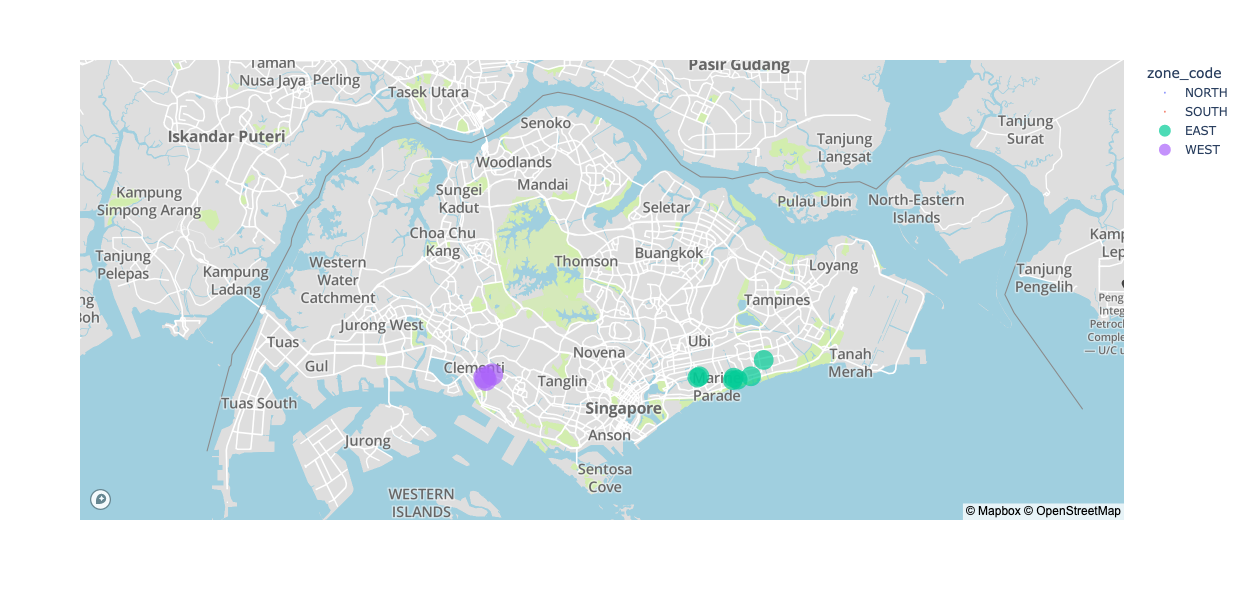

In [29]:
import plotly.express as px

mapbox_access_token =  'pk.eyJ1Ijoiam9lbGpydCIsImEiOiJjbGJqaW12enYxM3M3M3hvZ2M1dzk3MThxIn0.xk3qkRogSnlc-wml2x63kQ'
px.set_mapbox_access_token(mapbox_access_token)

fig = px.scatter_mapbox(df, 
                        lat="latitude", 
                        lon="longitude",     
                        color="zone_code", 
                        size="count",
                        hover_name = "school",
                        color_continuous_scale=px.colors.cyclical.IceFire,
                        mapbox_style='basic',
                        size_max=16, 
                        zoom=10.2,
                       width=1000, height=600)
fig.show()

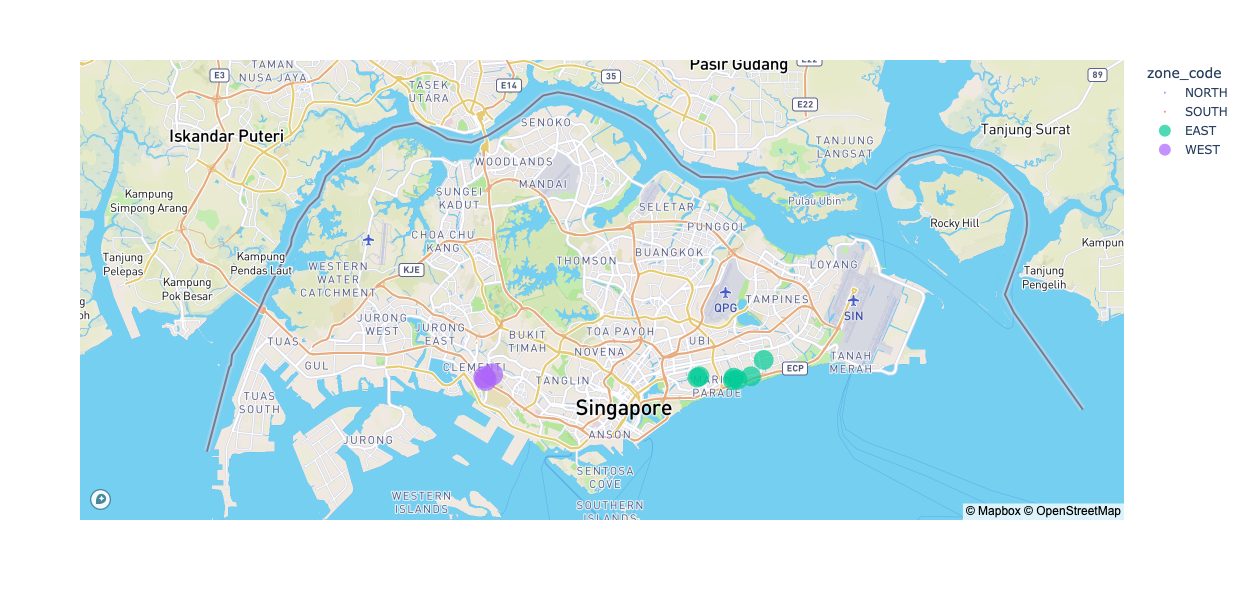

In [30]:
fig = px.scatter_mapbox(df, 
                        lat="latitude", 
                        lon="longitude",     
                        color="zone_code", 
                        size="count",
                        hover_name = "school",
                        color_continuous_scale=px.colors.cyclical.IceFire,
                        mapbox_style='outdoors',
                        size_max=16, 
                        zoom=10.2,
                       width=1000, height=600)
fig.show()

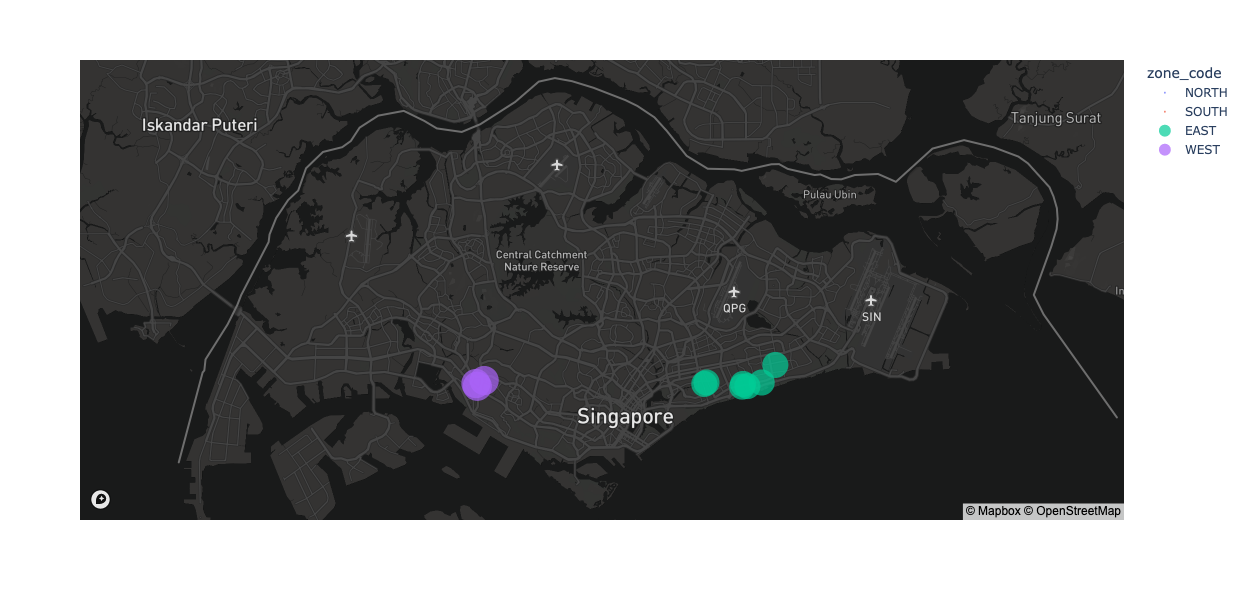

In [31]:
mapbox_access_token =  'pk.eyJ1Ijoiam9lbGpydCIsImEiOiJjbGJqaW12enYxM3M3M3hvZ2M1dzk3MThxIn0.xk3qkRogSnlc-wml2x63kQ'
px.set_mapbox_access_token(mapbox_access_token)

fig = px.scatter_mapbox(df, 
                        lat="latitude", 
                        lon="longitude",     
                        color="zone_code", 
                        size="count",
                        hover_name = "school",
                        color_continuous_scale=px.colors.cyclical.IceFire,
                        mapbox_style="dark",
                        size_max=21, 
                        zoom=10.3,
                       width=1000, height=600)
#fig.update_traces(cluster=dict(enabled=True))
fig.show()

In [32]:
#Pickle df
df.to_pickle('dataset/df_for_deployment.pkl')